In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('data/base_prospect.csv', encoding='ISO-8859-1')
column_names = df.head()
df


,code_cr,dept,effectif,ca_total_FL,ca_export_FK,risque,endettement,evo_benefice,ratio_benef,evo_effectif,evo_risque,age,type_com,activite,actionnaire,forme_jur_simpl,chgt_dir,rdv
0,GPVL,80,28,3362,0.0,11-13,0.646695,-2.285714,-0.535396,0.217000,0.0,54,Pôle urbain,Commerce de gros et intermédiaires du commerce,personne physique,Societe anonyme,NaN,0
1,GPVL,80,15,4607,0.0,14,0.400985,0.392857,1.693076,0.000000,0.0,52,Pôle urbain,Commerce de gros et intermédiaires du commerce,famille,Société par actions simplifiée,NaN,0
2,GPVL,80,19,21,0.0,11-13,0.972222,-0.666667,4.761905,0.000000,0.0,52,Espace à dominante rurale,Industrie manufacturière : Métallurgie. travai...,pas d'actionnaire,SARL,0.0,0
3,GPVL,80,11,1065,0.0,8-10,0.485520,0.729167,-1.220657,-0.083000,-1.0,51,Pôle urbain,Industrie alimentaire. bois.cuir,entreprise,Société par actions simplifiée,0.0,0
4,GPVL,80,17,2576,228.0,11-13,0.612903,-2.012270,-6.405280,0.000000,-1.0,51,Pôle urbain,Industrie manufacturière : Métallurgie. travai...,pas d'actionnaire,Société par actions simplifiée,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108571,GAM,13,16,2141,1.0,14,0.466483,4.341117,9.513534,-0.126244,0.0,15,Espace à dominante rurale,Santé et action sociale. services sociaux. édu...,entreprise,Société par actions simplifiée,0.0,0
108572,GCM,61,43,5442,352.0,8-10,0.841737,0.229162,-6.145799,0.027814,0.0,7,Pôle urbain,Industrie manufacturière : Métallurgie. travai...,entreprise,Société par actions simplifiée,NaN,0
108573,GRAA,63,146,16264,1.0,14,0.101439,0.834199,5.023770,0.027260,0.0,45,Pôle urbain,Construction : Autres,entreprise,Société par actions simplifiée,NaN,0
108574,GGE,21,203,71067,33556.0,14,0.518589,2.682676,10.180021,0.000000,0.0,22,Espace à dominante rurale,Industrie manufacturière : Métallurgie. travai...,entreprise,Société par actions simplifiée,NaN,0


/var/folders/x7/jxq9slps3tx5wj2t065bnl740000gn/T/ipykernel_36726/1413581206.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['code_cr']).sum().plot(kind='bar', y='effectif')


<AxesSubplot: xlabel='code_cr'>

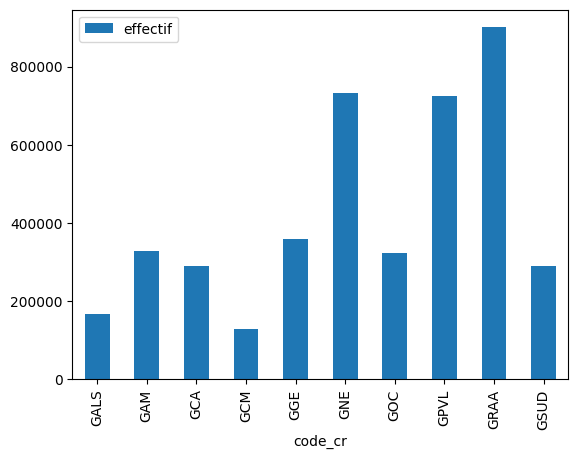

In [32]:
# Code de la caisse régionale
df['code_cr']
df.groupby(['code_cr']).sum().plot(kind='bar', y='effectif')


<AxesSubplot: ylabel='Frequency'>

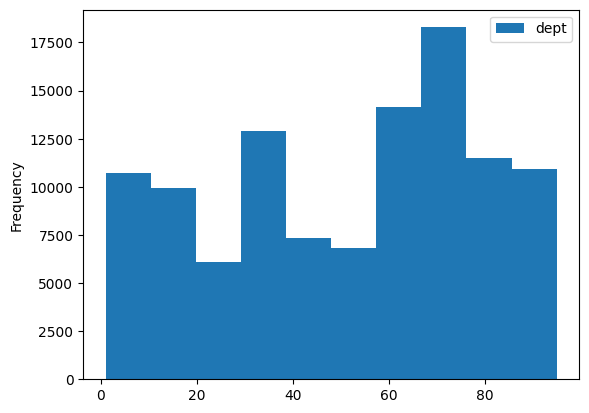

In [45]:
# Numéro de departement
dept = df.pivot_table(index = ['dept'], aggfunc =['size'])
dept.sort_values(by=['size'], ascending=False)
df.plot(kind='hist',y='dept')


In [10]:
df['risque'].isnull().values.sum()


936

In [6]:
risque = df.pivot_table(index = ['risque'], aggfunc =['size'])
risque
df.plot(kind='hist',y='risque')

,size
risque,
1-6,2435
11-13,25203
14,50830
7,2201
8-10,26971


In [8]:
risque_1_6 = df.loc[df['risque'] == '1-6']
risque_1_6['risque'] = 7.5

/var/folders/x7/jxq9slps3tx5wj2t065bnl740000gn/T/ipykernel_44424/4216321850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risque_1_6['risque'] = 7.5


In [7]:
df.plot(kind='scatter',x='dept',y='age')

SyntaxError: EOL while scanning string literal (3997594996.py, line 1)

In [95]:
# Effectif
print('Max Effectif : ',df['effectif'].max())
print('Min Effectif : ',df['effectif'].min())
print('Median Effectif : ',df['effectif'].median())


Max Effectif :  15783
Min Effectif :  3
Median Effectif :  21.0


In [98]:
# CA
print('Max CA : ',df['ca_total_FL'].max())
print('Min CA : ',df['ca_total_FL'].min())
print('Median CA : ',df['ca_total_FL'].median())

Max CA :  5071221
Min CA :  -162
Median CA :  2383.0


In [102]:
# Evol benef
print('Max Evol benef : ',df['evo_benefice'].max())
print('Min Evol benef : ',df['evo_benefice'].min())
print('Median Evol Benef : ',df['evo_benefice'].median())

Max Evol benef :  3334.31814301801
Min Evol benef :  -1763.73619617987
Median Evol Benef :  0.16278022257741498


In [103]:
# Ratio benef
print('Max ratio benef : ',df['ratio_benef'].max())
print('Min ration benef: ',df['ratio_benef'].min())
print('Median ratio benef: ',df['ratio_benef'].median())

Max ratio benef :  68999.575515223
Min ration benef:  -13015.0523794849
Median ratio benef:  3.11367562731436
